In [1]:
import pandas as pd
import numpy as np

In [2]:
stats = pd.read_csv("./mvp_votings.csv").drop(columns='Unnamed: 0')
pd.set_option('display.max_columns', None)
stats

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,win_pct,votes_first,points_won,points_max,award_share,g,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,0.756098,28.0,454.0,690.0,0.658,82.0,35.0,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231
1,18.3,0.9,4.0,19.9,0.528,24.3,5.1,1980-81,Larry Bird,0.756098,20.0,423.0,690.0,0.613,82.0,39.5,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160
2,18.2,0.0,6.9,25.5,0.616,26.3,5.3,1980-81,Kareem Abdul-Jabbar,0.658537,8.0,286.0,690.0,0.414,80.0,37.2,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230
3,19.3,0.0,10.1,25.1,0.585,27.6,3.7,1980-81,Moses Malone,0.487805,8.0,180.0,690.0,0.261,80.0,40.6,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202
4,21.1,0.4,7.6,22.9,0.555,32.3,1.6,1980-81,George Gervin,0.634146,1.0,83.0,690.0,0.120,82.0,33.7,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,18.0,1.2,5.3,25.0,0.570,29.1,3.3,2017-18,LaMarcus Aldridge,0.573171,0.0,6.0,1010.0,0.006,75.0,33.5,23.1,8.5,2.0,0.6,1.2,0.510,0.293,0.837,10.9,0.209
633,15.6,3.4,7.2,23.7,0.590,24.9,5.0,2017-18,Jimmy Butler,0.573171,0.0,5.0,1010.0,0.005,59.0,36.7,22.2,5.3,4.9,2.0,0.4,0.474,0.350,0.854,8.9,0.198
634,16.9,9.8,5.9,28.2,0.675,31.0,8.6,2017-18,Stephen Curry,0.707317,0.0,5.0,1010.0,0.005,51.0,32.0,26.4,5.1,6.1,1.6,0.2,0.495,0.423,0.921,9.1,0.267
635,16.8,3.4,7.4,22.9,0.573,33.4,2.6,2017-18,Joel Embiid,0.634146,0.0,4.0,1010.0,0.004,63.0,30.3,22.9,11.0,3.2,0.6,1.8,0.483,0.308,0.769,6.2,0.155


In [3]:
#set whole column to 'No', then just change to 'Yes' for mvp winners
stats['Mvp?']='No'

#for every season
for season in stats['season'].value_counts().index:
    
    #isolate data from that season
    season_df=stats[stats['season'].isin([season])]
    
    #get the index of player with most mvp points
    index=[season_df['points_won'].idxmax()]
    
    #change player's 'Mvp?' entry to yes
    stats['Mvp?'][index]='Yes'

C:\Users\diego\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

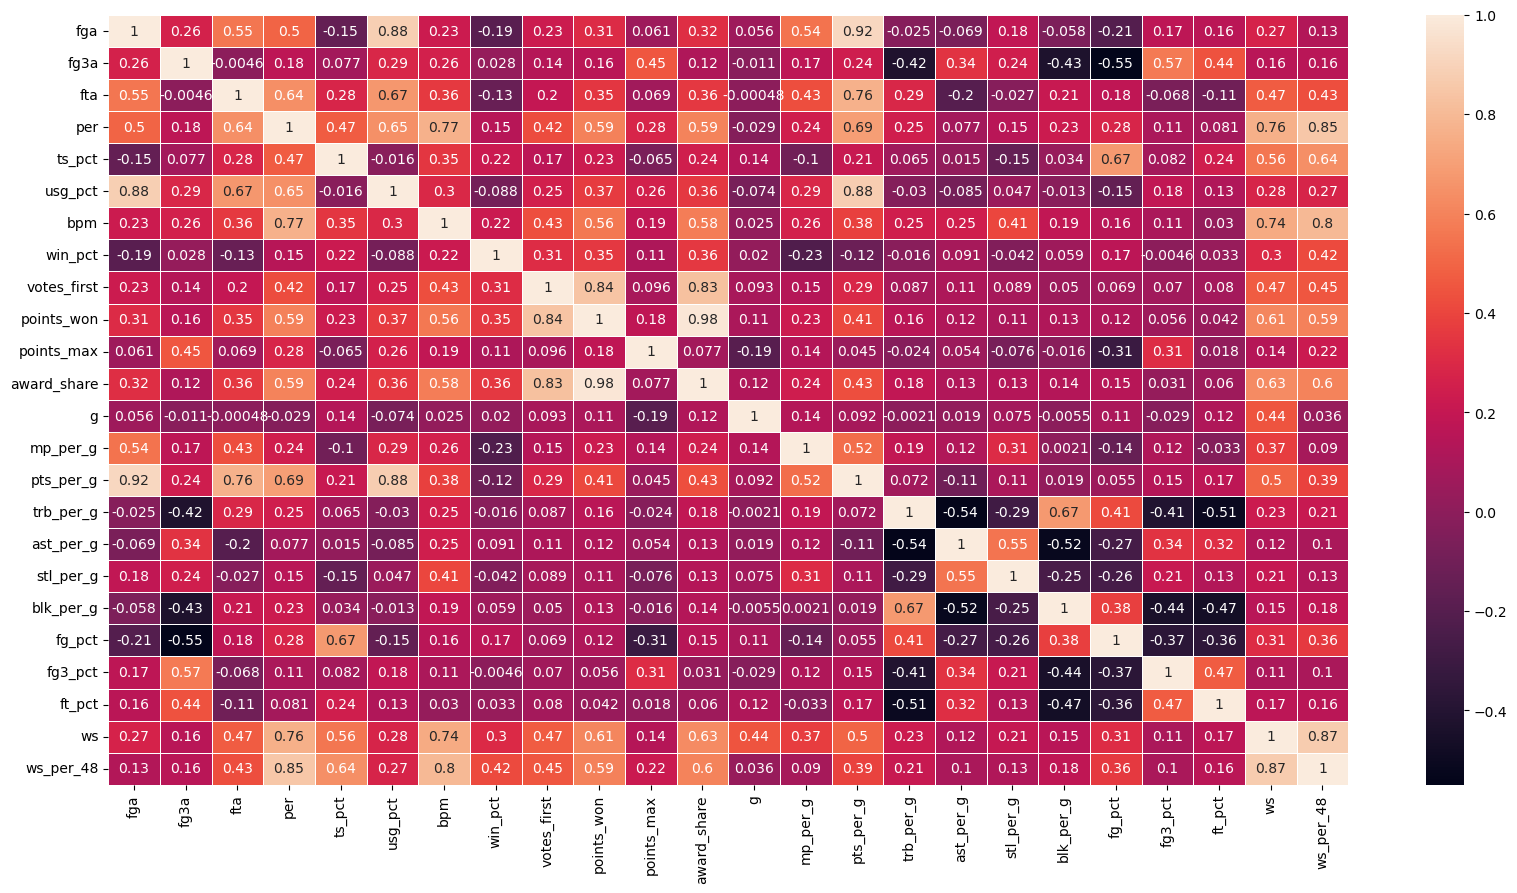

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(stats.corr(),annot=True,linewidth=0.5)

In [7]:
df=pd.DataFrame(stats.corr()['award_share']).reset_index()
df['Beat Threshold']=abs(df['award_share'])>0.45

In [9]:
stats.dtypes

fga            float64
fg3a           float64
fta            float64
per            float64
ts_pct         float64
usg_pct        float64
bpm            float64
season          object
player          object
win_pct        float64
votes_first    float64
points_won     float64
points_max     float64
award_share    float64
g              float64
mp_per_g       float64
pts_per_g      float64
trb_per_g      float64
ast_per_g      float64
stl_per_g      float64
blk_per_g      float64
fg_pct         float64
fg3_pct        float64
ft_pct         float64
ws             float64
ws_per_48      float64
Mvp?            object
dtype: object

In [10]:
stats["fga"] = stats["fga"].astype(float)

In [11]:
stats.dtypes

fga            float64
fg3a           float64
fta            float64
per            float64
ts_pct         float64
usg_pct        float64
bpm            float64
season          object
player          object
win_pct        float64
votes_first    float64
points_won     float64
points_max     float64
award_share    float64
g              float64
mp_per_g       float64
pts_per_g      float64
trb_per_g      float64
ast_per_g      float64
stl_per_g      float64
blk_per_g      float64
fg_pct         float64
fg3_pct        float64
ft_pct         float64
ws             float64
ws_per_48      float64
Mvp?            object
dtype: object

ValueError: could not convert string to float: 'fga'

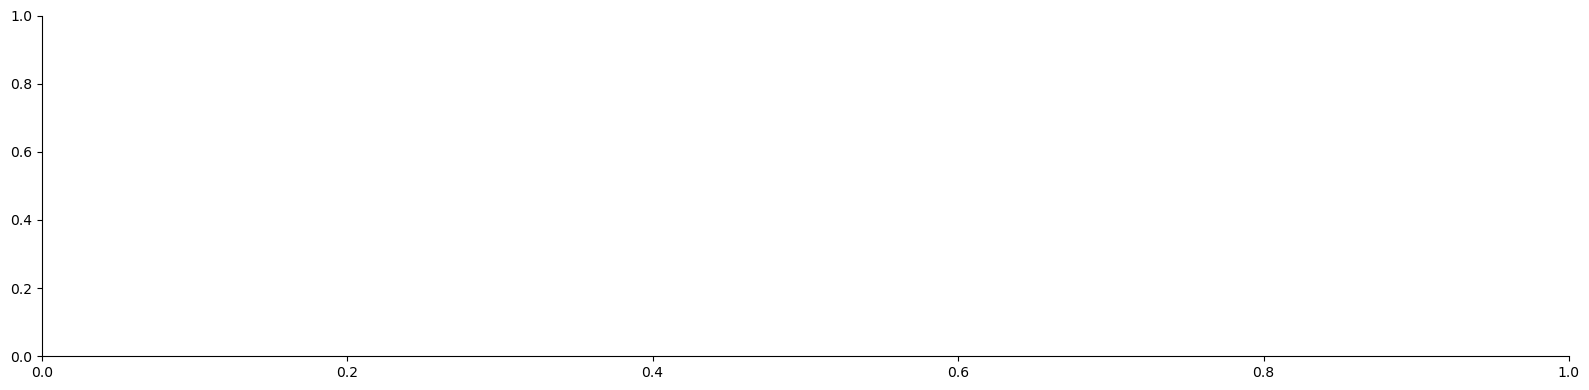

In [12]:
sns.lmplot(x='index', y="award_share", data=df,hue='Beat Threshold',fit_reg=False,height=4,
           
           aspect=4).set_xticklabels(rotation=90)